# Accuracy Evaluation

In order to evaluate a model's success, we compute the AP scores based on the segmentation results and on the predicted bounding boxes.

#### Imports

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
from accuracy_metrics import *

#### Ground truth annotations

In [2]:
pth_ = '../via_region_data_val.json'
f = open(pth_)
data = json.load(f)

In [3]:
names_dict = {}

for ky in data.keys():
    nm = data[ky]['filename']
    names_dict[nm] = ky

## Mask rCNN Results

#### Paths to predictions (Mask rCNN outputs)

In [4]:
predictions_path = '../CNN_Results/resized_training/all'
files = [[f,predictions_path+'/'+f] for f in os.listdir(predictions_path)]

#### Classification metrics per iou threshold, per image

In [5]:
meta_table = []
total_predictions = 0
total_ground = 0
iou_thresholds = [0.5,0.75,0.9]
for file in tqdm.tqdm(files):
    filename,pred_path = file
    try:
        filename = filename[:-3]+'JPG'
        dict_name = names_dict[filename]
    except:
        filename = filename[:-3]+'jpg'
        dict_name = names_dict[filename]
    dfs,total_pred,total_grnd = get_TP_FP(pred_path,dict_name,filename,data,maskType="mask",
                                          iou_thresholds=iou_thresholds)
    meta_table.append(dfs)
    total_predictions = total_predictions+total_pred
    total_ground = total_ground+total_grnd
    
print("Total pred/ground: ",[total_predictions,total_ground])

100%|█████████████████████████████████████████| 301/301 [00:55<00:00,  5.39it/s]

Total pred/ground:  [1190, 895]


#### Dataframes of classification metrics for entire dataset

In [6]:
all_dataframes = {}
n = len(files)
for i,t in enumerate(iou_thresholds):
    df_ = pd.DataFrame(meta_table[0][i]).T
    for j in range(1,n):
        dfj = pd.DataFrame(meta_table[j][i]).T
        df_ = pd.concat([df_,dfj])
    df_ = df_.reset_index(drop=True)
    all_dataframes[t] = df_

### Precision & Recall curves and AP scores, per threshold

#### For masks:

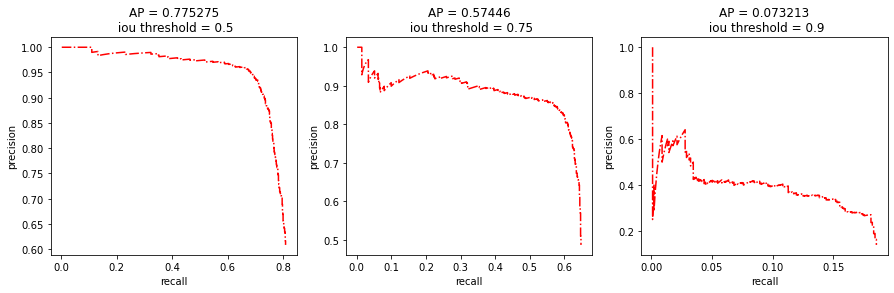

In [7]:
N = len(iou_thresholds)

fig,ax = plt.subplots(1,N,figsize=(N*5,4))

for i,thresh in enumerate(iou_thresholds):
    df,AP = get_pr_curve_and_AP(all_dataframes[thresh],total_ground)
    AP = np.round(AP,6)
    ax[i].plot(df['recall'],df['precision'],'-.r')
    ax[i].set_title('AP = '+str(AP)+'\n iou threshold = '+str(thresh))
    ax[i].set_xlabel('recall')
    ax[i].set_ylabel('precision')

#### For bounding boxes:
(Note that these were computed earlier. To recreate this graph re-run the classification tab but set *maskType=="box"*.)

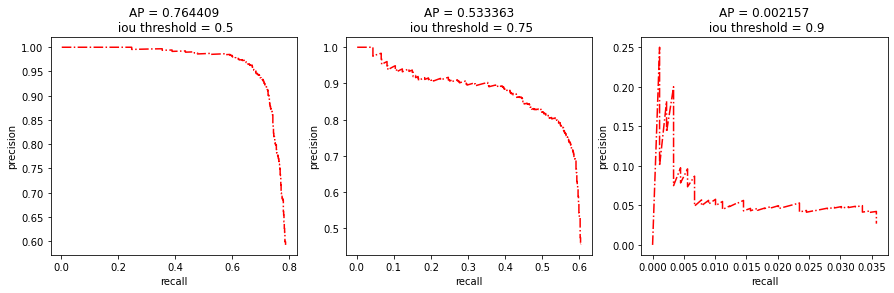

In [16]:
N = len(iou_thresholds)

fig,ax = plt.subplots(1,N,figsize=(N*5,4))

for i,thresh in enumerate(iou_thresholds):
    df,AP = get_pr_curve_and_AP(all_dataframes[thresh],total_ground)
    AP = np.round(AP,6)
    ax[i].plot(df['recall'],df['precision'],'-.r')
    ax[i].set_title('AP = '+str(AP)+'\n iou threshold = '+str(thresh))
    ax[i].set_xlabel('recall')
    ax[i].set_ylabel('precision')

### Precision & Recall curves and AP scores, per threshold (iou sort)
Here, sorting is done by iou instead of bounding box confidence score

#### For masks:

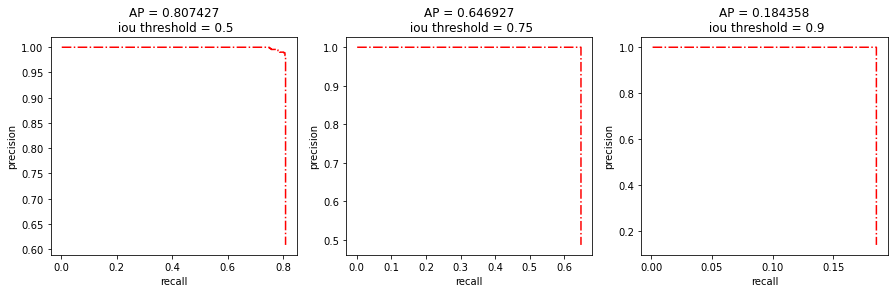

In [9]:
N = len(iou_thresholds)

fig,ax = plt.subplots(1,N,figsize=(N*5,4))

for i,thresh in enumerate(iou_thresholds):
    df,AP = get_pr_curve_and_AP(all_dataframes[thresh],total_ground,sorting="iou")
    AP = np.round(AP,6)
    ax[i].plot(df['recall'],df['precision'],'-.r')
    ax[i].set_title('AP = '+str(AP)+'\n iou threshold = '+str(thresh))
    ax[i].set_xlabel('recall')
    ax[i].set_ylabel('precision')

#### For bounding boxes:

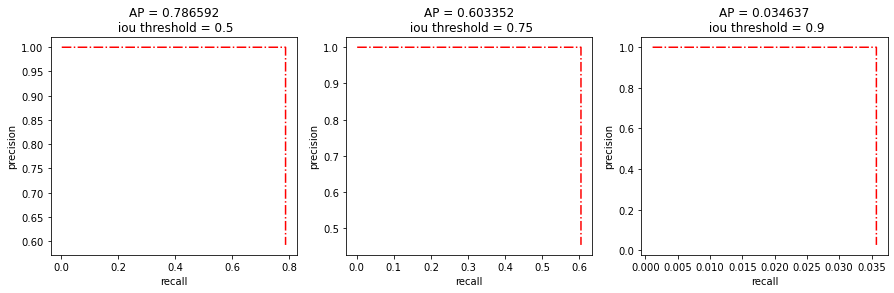

In [15]:
N = len(iou_thresholds)

fig,ax = plt.subplots(1,N,figsize=(N*5,4))

for i,thresh in enumerate(iou_thresholds):
    df,AP = get_pr_curve_and_AP(all_dataframes[thresh],total_ground,sorting="iou")
    AP = np.round(AP,6)
    ax[i].plot(df['recall'],df['precision'],'-.r')
    ax[i].set_title('AP = '+str(AP)+'\n iou threshold = '+str(thresh))
    ax[i].set_xlabel('recall')
    ax[i].set_ylabel('precision')

## Detectron Results

#### Paths to predictions

In [10]:
predictions_path = '/home/arias1/Downloads/detectron_masks/detectron_masks'
files = [[f,predictions_path+'/'+f] for f in os.listdir(predictions_path)]

#### Classification metrics per iou threshold, per image

In [11]:
meta_table = []
total_predictions = 0
total_ground = 0
iou_thresholds = [0.5,0.75,0.9]
for file in tqdm.tqdm(files):
    filename,pred_path = file
    try:
        filename = filename[:-3]+'JPG'
        dict_name = names_dict[filename]
    except:
        filename = filename[:-3]+'jpg'
        dict_name = names_dict[filename]
    dfs,total_pred,total_grnd = get_TP_FP(pred_path,dict_name,filename,data,iou_thresholds=iou_thresholds,
                                         maskType="mask")
    meta_table.append(dfs)
    total_predictions = total_predictions+total_pred
    total_ground = total_ground+total_grnd
    
print("Total pred/ground: ",[total_predictions,total_ground])

100%|█████████████████████████████████████████| 301/301 [01:24<00:00,  3.58it/s]

Total pred/ground:  [992, 895]


#### Dataframes of classification metrics for entire dataset

In [12]:
all_dataframes = {}
n = len(files)
for i,t in enumerate(iou_thresholds):
    df_ = pd.DataFrame(meta_table[0][i]).T
    for j in range(1,n):
        dfj = pd.DataFrame(meta_table[j][i]).T
        df_ = pd.concat([df_,dfj])
    df_ = df_.reset_index(drop=True)
    all_dataframes[t] = df_

### Precision & Recall curves and AP scores, per threshold (iou sort)
Note: Here, we sorted by iou instead of bb confidence score.

#### For masks:

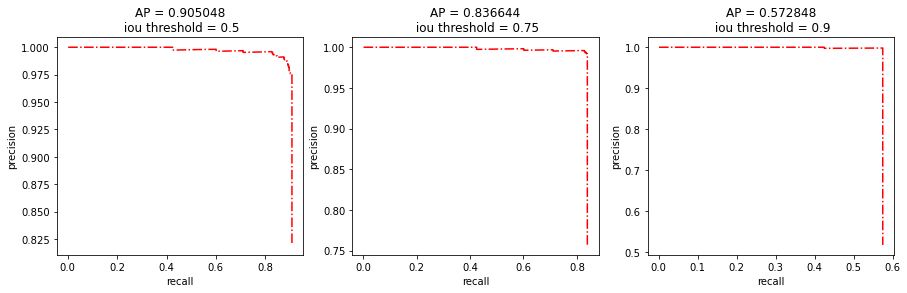

In [13]:
N = len(iou_thresholds)

fig,ax = plt.subplots(1,N,figsize=(N*5,4))

for i,thresh in enumerate(iou_thresholds):
    df,AP = get_pr_curve_and_AP(all_dataframes[thresh],total_ground,sorting="iou")
    AP = np.round(AP,6)
    ax[i].plot(df['recall'],df['precision'],'-.r')
    ax[i].set_title('AP = '+str(AP)+'\n iou threshold = '+str(thresh))
    ax[i].set_xlabel('recall')
    ax[i].set_ylabel('precision')

#### For bounding boxes:
(Note that these were computed earlier. To recreate this graph re-run the classification tab but set *maskType=="box"*.)

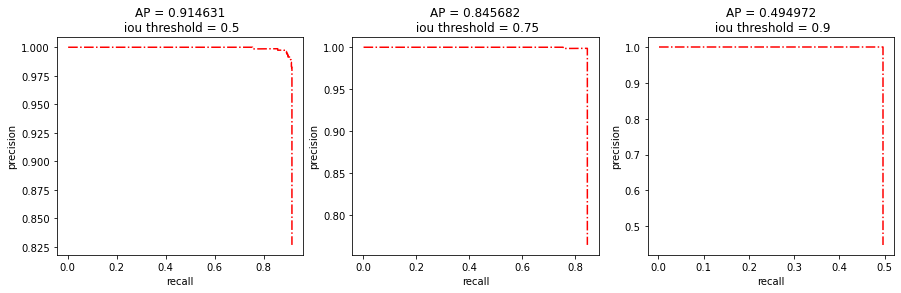

In [9]:
N = len(iou_thresholds)

fig,ax = plt.subplots(1,N,figsize=(N*5,4))

for i,thresh in enumerate(iou_thresholds):
    df,AP = get_pr_curve_and_AP(all_dataframes[thresh],total_ground,sorting="iou")
    AP = np.round(AP,6)
    ax[i].plot(df['recall'],df['precision'],'-.r')
    ax[i].set_title('AP = '+str(AP)+'\n iou threshold = '+str(thresh))
    ax[i].set_xlabel('recall')
    ax[i].set_ylabel('precision')